<a href="https://www.kaggle.com/code/lalit7881/silver-price-time-series-prediction-r-99-93?scriptVersionId=294775763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/silver-prices-2011-2026history-and-forecasting-data/silver_prices_data.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/silver-prices-2011-2026history-and-forecasting-data/silver_prices_data.csv")

In [3]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2011-01-24,27.318001,27.459999,26.955000,27.174999,168
1,2011-01-25,26.811001,26.950001,26.565001,26.915001,77
2,2011-01-26,27.132000,27.025000,26.684999,27.025000,49
3,2011-01-27,27.045000,27.684999,27.410000,27.684999,184
4,2011-01-28,27.934000,27.950001,26.504999,26.695000,64


In [4]:
df.tail()

,Date,Close,High,Low,Open,Volume
3763,2026-01-12,84.610001,85.824997,82.000000,82.000000,575
3764,2026-01-13,85.876999,88.610001,84.589996,84.904999,341
3765,2026-01-14,90.869003,93.000000,88.705002,89.349998,470
3766,2026-01-15,91.875999,92.419998,86.129997,90.824997,390
3767,2026-01-16,88.091003,90.925003,86.195000,90.440002,390


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3768 non-null   object 
 1   Close   3768 non-null   float64
 2   High    3768 non-null   float64
 3   Low     3768 non-null   float64
 4   Open    3768 non-null   float64
 5   Volume  3768 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 176.8+ KB


In [6]:
df.describe()

,Close,High,Low,Open,Volume
count,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000
mean,23.497272,23.684994,23.314177,23.503893,1815.771231
std,8.690819,8.845847,8.520700,8.678501,10201.389877
min,11.735000,12.205000,11.735000,12.070000,0.000000
25%,16.947750,17.017999,16.869501,16.928750,10.000000
50%,21.737000,21.864500,21.595000,21.730499,48.000000
75%,27.967750,28.126250,27.724999,27.905000,168.000000
max,91.875999,93.000000,88.705002,90.824997,170297.000000


In [7]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [10]:
df.shape

(3768, 6)

In [11]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

## Data visualizations

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

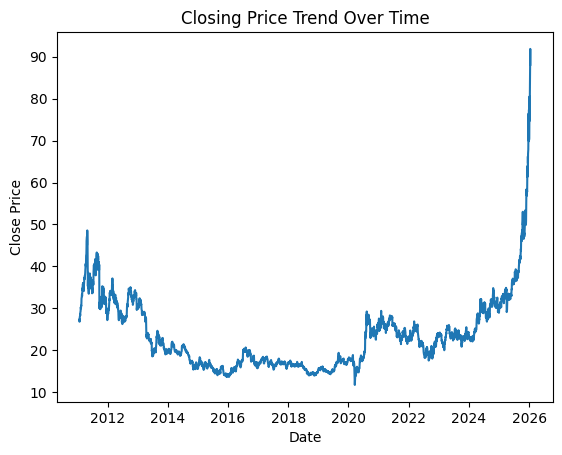

In [13]:
plt.figure()
plt.plot(df['Date'], df['Close'])
plt.title("Closing Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


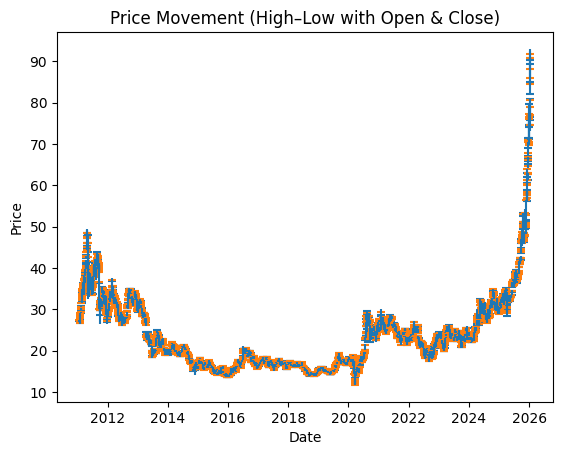

In [14]:
plt.figure()
plt.vlines(df['Date'], df['Low'], df['High'])
plt.scatter(df['Date'], df['Open'], marker='_')
plt.scatter(df['Date'], df['Close'], marker='_')
plt.title("Price Movement (High–Low with Open & Close)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


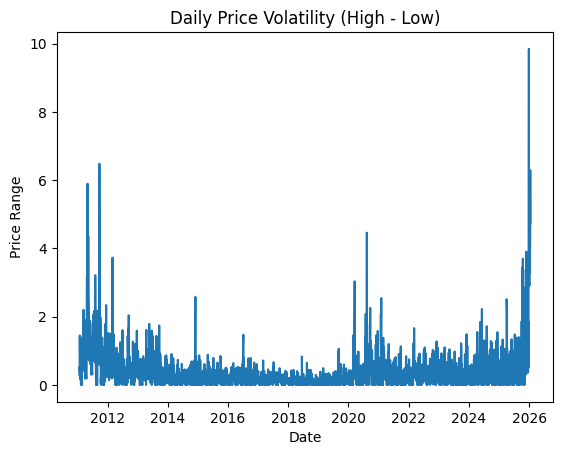

In [15]:
df['Daily_Range'] = df['High'] - df['Low']

plt.figure()
plt.plot(df['Date'], df['Daily_Range'])
plt.title("Daily Price Volatility (High - Low)")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.show()


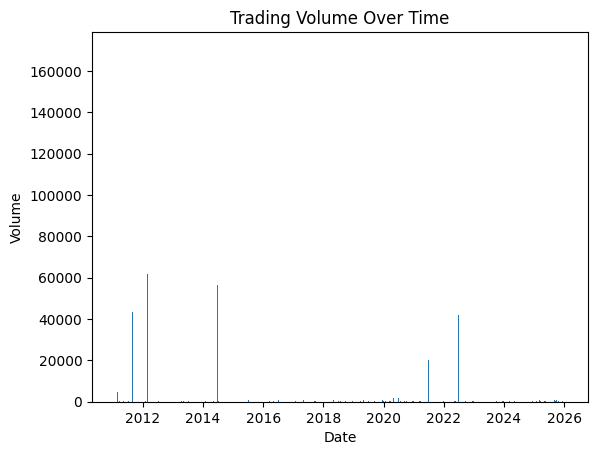

In [16]:
plt.figure()
plt.bar(df['Date'], df['Volume'])
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


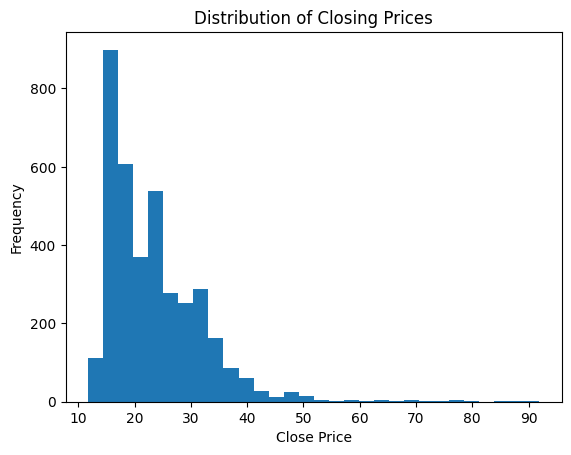

In [17]:
plt.figure()
plt.hist(df['Close'], bins=30)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()


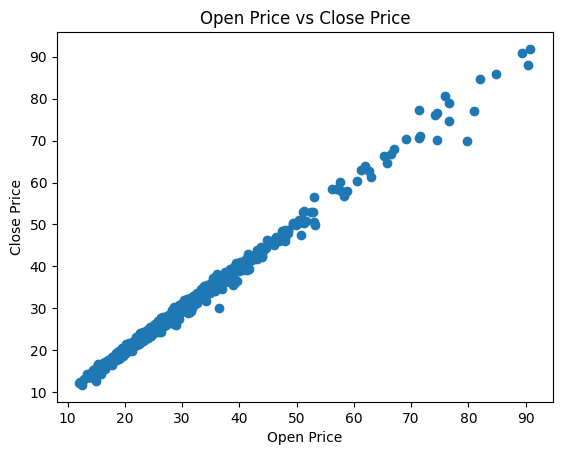

In [18]:
plt.figure()
plt.scatter(df['Open'], df['Close'])
plt.title("Open Price vs Close Price")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()


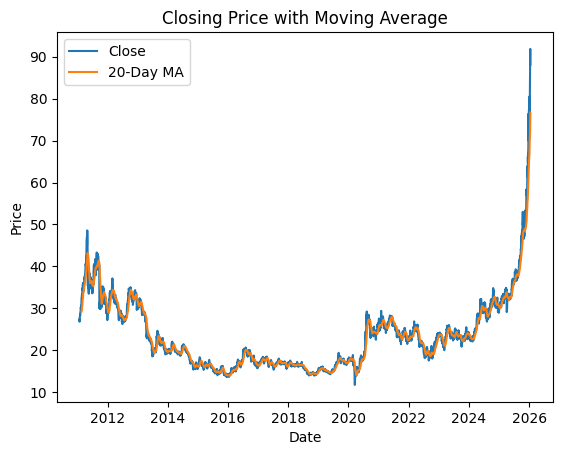

In [19]:
df['MA_20'] = df['Close'].rolling(window=20).mean()

plt.figure()
plt.plot(df['Date'], df['Close'], label="Close")
plt.plot(df['Date'], df['MA_20'], label="20-Day MA")
plt.title("Closing Price with Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


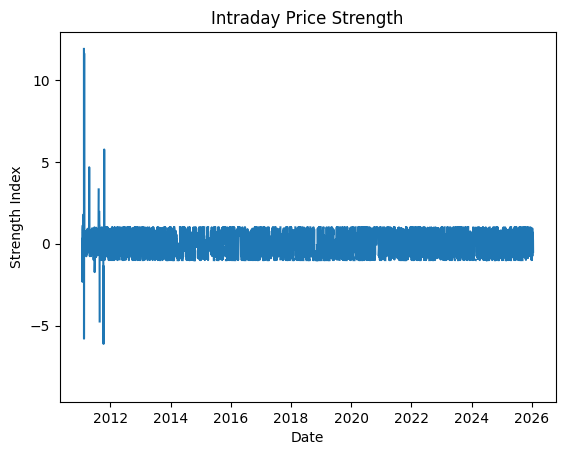

In [20]:
df['Intraday_Strength'] = (df['Close'] - df['Open']) / (df['High'] - df['Low'])

plt.figure()
plt.plot(df['Date'], df['Intraday_Strength'])
plt.title("Intraday Price Strength")
plt.xlabel("Date")
plt.ylabel("Strength Index")
plt.show()


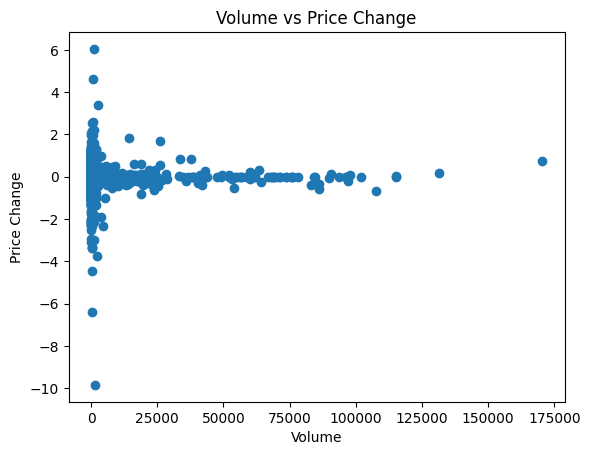

In [21]:
df['Price_Change'] = df['Close'] - df['Open']

plt.figure()
plt.scatter(df['Volume'], df['Price_Change'])
plt.title("Volume vs Price Change")
plt.xlabel("Volume")
plt.ylabel("Price Change")
plt.show()


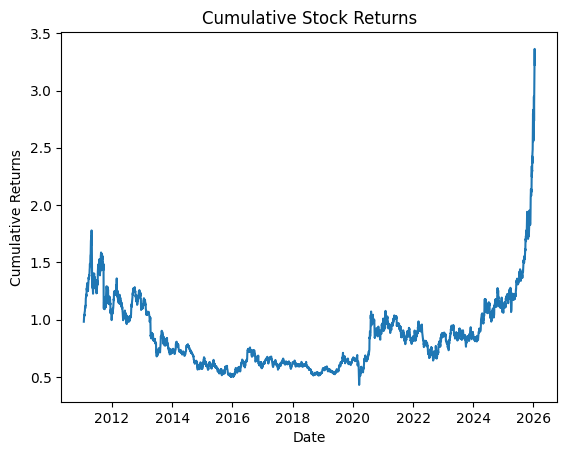

In [22]:
df['Returns'] = df['Close'].pct_change()
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod()

plt.figure()
plt.plot(df['Date'], df['Cumulative_Returns'])
plt.title("Cumulative Stock Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.show()


## Feature engg

In [23]:
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)

df.dropna(inplace=True)


In [24]:
X = df[['Open','High','Low','Volume','Close_Lag1','Close_Lag2','Close_Lag3']]
y = df['Close']

split = int(len(df) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [25]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200)
}


In [27]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

    print(f"\n{name}")
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R2  :", r2)



Linear Regression
MAE : 0.1529745359929665
RMSE: 0.3002780126640013
R2  : 0.9993392216894768

Ridge Regression
MAE : 0.332881422462228
RMSE: 0.6106272964598353
R2  : 0.9972674938874018

Lasso Regression
MAE : 0.22197222783774326
RMSE: 0.4164627289418154
R2  : 0.9987289548009817

Support Vector Regressor
MAE : 3.1990572803284936
RMSE: 10.564510084621602
R2  : 0.18208638517839948

KNN Regressor
MAE : 1.6275082005648327
RMSE: 5.931439109074379
R2  : 0.7421727204728872

Decision Tree
MAE : 1.483529280386177
RMSE: 5.545605432348587
R2  : 0.7746245295316567

Random Forest
MAE : 1.478227412864162
RMSE: 5.720181085674548
R2  : 0.760211545459915

Gradient Boosting
MAE : 1.48570386804896
RMSE: 5.67281581522998
R2  : 0.7641661832672562


In [28]:
results_df = pd.DataFrame(
    results, 
    columns=["Model", "MAE", "RMSE", "R2 Score"]
)

print("\nModel Comparison")
print(results_df.sort_values(by="R2 Score", ascending=False))



Model Comparison
                      Model       MAE       RMSE  R2 Score
0         Linear Regression  0.152975   0.300278  0.999339
2          Lasso Regression  0.221972   0.416463  0.998729
1          Ridge Regression  0.332881   0.610627  0.997267
5             Decision Tree  1.483529   5.545605  0.774625
7         Gradient Boosting  1.485704   5.672816  0.764166
6             Random Forest  1.478227   5.720181  0.760212
4             KNN Regressor  1.627508   5.931439  0.742173
3  Support Vector Regressor  3.199057  10.564510  0.182086


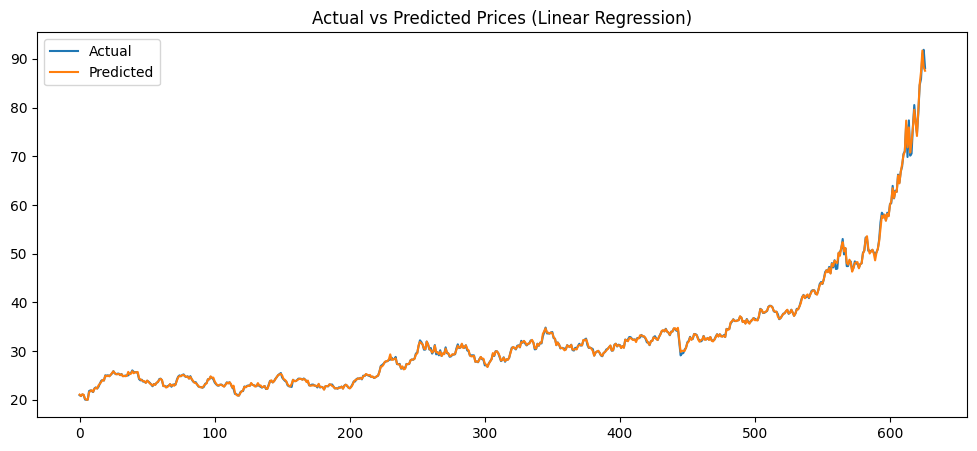

In [29]:
best_model_name = results_df.sort_values(
    by="R2 Score", ascending=False
).iloc[0]["Model"]

best_model = models[best_model_name]
best_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual")
plt.plot(best_pred, label="Predicted")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.legend()
plt.show()


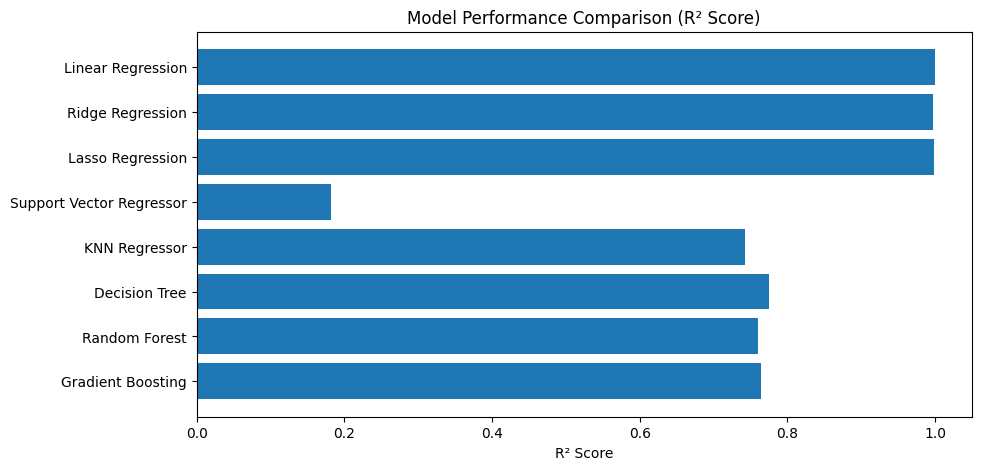

In [30]:
plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["R2 Score"])
plt.xlabel("R² Score")
plt.title("Model Performance Comparison (R² Score)")
plt.gca().invert_yaxis()
plt.show()


## Thank you...pls upvote!!!!!